In [5]:
import pandas as pd
import dbconn

In [6]:
mydb=dbconn.connect()

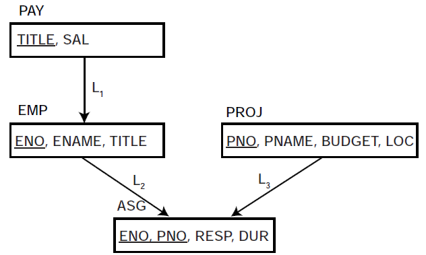

In [7]:
EMP_sql="""\
SELECT * FROM emp
"""

In [8]:
EMP = pd.read_sql(EMP_sql, con=mydb)

In [9]:
display(EMP)

,ENO,ENAME,TITLE,DOB,Dept
0,E1,J. Doe,Elect. Eng.,1976-07-04,Production
1,E2,M. Smith,Syst. Anal.,1952-03-12,Maintainace
2,E3,A. Lee,Mech. Eng.,1975-09-12,Management
3,E4,J. Miller,Programmer,1981-08-10,Production
4,E5,B. Casey,Syst. Anal.,1955-07-14,Management
5,E6,L. Chu,Elect. Eng.,1943-02-21,Production
6,E7,R. Davis,Mech. Eng.,1980-05-22,Production
7,E8,J. Jones,Syst. Anal.,1950-04-15,Maintainance


#### Example 3.6. Consider relation PAY of Figure 3.3. The following are some of the
possible simple predicates that can be defined on PAY.
* p1: TITLE = “Elect. Eng.”
* p2: TITLE = “Syst. Anal.”
* p3: TITLE = “Mech. Eng.”
* p4: TITLE = “Programmer”
* p5: SAL <= 30000

#### The following are some of the minterm predicates that can be defined based on
these simple predicates.

m1: TITLE = “Elect. Eng.” ^ SAL ≤ 30000

m2: TITLE = “Elect. Eng.” ^ SAL > 30000

m3: ¬(TITLE = “Elect. Eng.”) ^ SAL ≤ 30000

m4: ¬(TITLE = “Elect. Eng.”) ^ SAL > 30000

m5: TITLE = “Programmer” ^ SAL ≤ 30000

m6: TITLE = “Programmer” ^ SAL > 30000

##### these are not all the minterm predicates that can be defined
m1: TITLE = “Elect. Eng.” ^ TITLE ≠ “Syst. Anal.” ^ TITLE ≠ “Mech. Eng.” ^ TITLE ≠ “Programmer” ^ SAL ≤ 30000
this is not necessary, and we use the simplified form

### A primary horizontal fragmentation 
is defined by a selection operation on the owner relations of a database schema. Therefore, given relation R, its horizontal fragments are given by

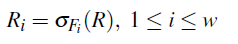

In [10]:
PROJ_sql="""\
SELECT * FROM proj ORDER BY PNO
"""

In [11]:
PROJ = pd.read_sql(PROJ_sql, con=mydb)

In [12]:
display(PROJ)

,PNO,PNAME,BUDGET,LOC
0,P1,Instrumentation,150000.0,Montreal
1,P2,Database Develop.,135000.0,New York
2,P3,CAD/CAM,250000.0,New York
3,P4,Maintenance,310000.0,Paris


where Fi is the selection formula used to obtain fragment Ri (also called the fragmentation predicate). Note that if Fi is in conjunctive normal form, it is a minterm predicate (mi). The algorithm we discuss will, in fact, insist that Fi be a minterm
predicate.
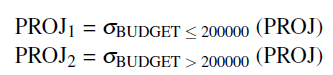

In [13]:
PROJ1_sql="""\
SELECT * FROM proj WHERE BUDGET<=200000 ORDER BY PNO
"""

In [14]:
PROJ1 = pd.read_sql(PROJ1_sql, con=mydb)

In [15]:
display(PROJ1)

,PNO,PNAME,BUDGET,LOC
0,P1,Instrumentation,150000.0,Montreal
1,P2,Database Develop.,135000.0,New York


In [16]:
PROJ2_sql="""\
SELECT * FROM proj WHERE BUDGET>200000 ORDER BY PNO
"""

In [17]:
PROJ2 = pd.read_sql(PROJ2_sql, con=mydb)

In [18]:
display(PROJ2)

,PNO,PNAME,BUDGET,LOC
0,P3,CAD/CAM,250000.0,New York
1,P4,Maintenance,310000.0,Paris


**Previous Example** demonstrates one of the problems of horizontal partitioning. 
If the domain of the attributes participating in the selection formulas are continuous and infinite, it is quite difficult to define the set of formulas F = {F1, F2,...Fn} that would fragment the relation properly.

For example, 
if a new tuple with a BUDGET value of, say, $600,000 were to be inserted into PROJ, one would have had to review the fragmentation to decide if the new tuple is to go into PROJ2 or if the fragments need to be revised and a new fragment needs to be defined as:
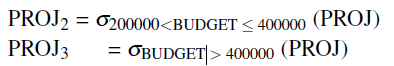

**Example** 
We can define the following horizontal fragments based on the project location.
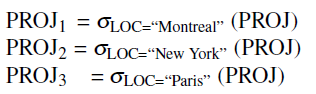

In [ ]:
PROJ1_sql="""\
SELECT * FROM proj WHERE LOC='Montreal' ORDER BY PNO
"""
PROJ1 = pd.read_sql(PROJ1_sql, con=mydb)
display(PROJ1)

In [ ]:
PROJ2_sql="""\
SELECT * FROM proj WHERE LOC='New York' ORDER BY PNO
"""
PROJ2 = pd.read_sql(PROJ2_sql, con=mydb)
display(PROJ2)

In [ ]:
PROJ3_sql="""\
SELECT * FROM proj WHERE LOC='Paris' ORDER BY PNO
"""
PROJ3 = pd.read_sql(PROJ3_sql, con=mydb)
display(PROJ3)

#### From the foregoing discussion it is obvious that the definition of the horizontal fragments depends on minterm predicates.

In [ ]:
PROJ_sql="""\
(SELECT * FROM proj WHERE LOC='Montreal' ORDER BY PNO)
UNION
(SELECT * FROM proj WHERE LOC='New York' ORDER BY PNO)
UNION
(SELECT * FROM proj WHERE LOC='Paris' ORDER BY PNO)
"""
PROJ = pd.read_sql(PROJ_sql, con=mydb)
display(PROJ)